# Tarea - Ajuste de curvas

Nombre: Israel Santiago Gómez

Materia: Simulación matemática

Fecha: 14/09/2023

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

---
### Problema 1

Los siguientes datos representan el costo en dólares de la electricidad según Western Electricity Coordinating Council desde el 2014 (y su pronóstico para el 2040)

Tomado de:
https://www.quandl.com/data/EIA/AEO_2016_REF_NO_CPP_PRCE_NA_COMM_NA_ELC_NA_WECCRKS_NCNTPKWH_A-Electricity-End-Use-Prices-Commercial-Western-Electricity-Coordinating-Council-Rockies-No-CPP-AEO2016

In [1]:
import numpy as np
data = np.array([10.051101,  9.259127,  9.444813,  9.557723,  9.977324, 10.298326,
       10.447217, 10.550506, 10.590784, 10.657418, 10.743085, 10.831965,
       10.988435, 11.153055, 11.313326, 11.557165, 11.860136, 12.122511,
       12.356448, 12.611391, 12.814569, 13.111372, 13.357134, 13.559012,
       13.85861 , 14.135924, 14.436149])

1. Ajuste estos datos a polinomios de grado 1 hasta 3 (los datos en $x$ corresponden a los años de 2014 a 2040, sin embargo son valores muy grandes para elevarlos a una potencia, use una representación para estos años, por ejemplo $2014 \rightarrow 0$ y $2040\rightarrow 26$).

2. Muestre las tres curvas ajustadas junto a los datos de los costos en un solo gráfico

C:\Users\PC\AppData\Local\Temp\ipykernel_19920\20636007.py:28: DeprecationWarning: Use of `minimize` with `x0.ndim != 1` is deprecated. Currently, singleton dimensions will be removed from `x0`, but an error will be raised in SciPy 1.11.0.
  sol = opt.minimize(funcion_de_costo, beta_inicial, args=(X, y_vector))
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


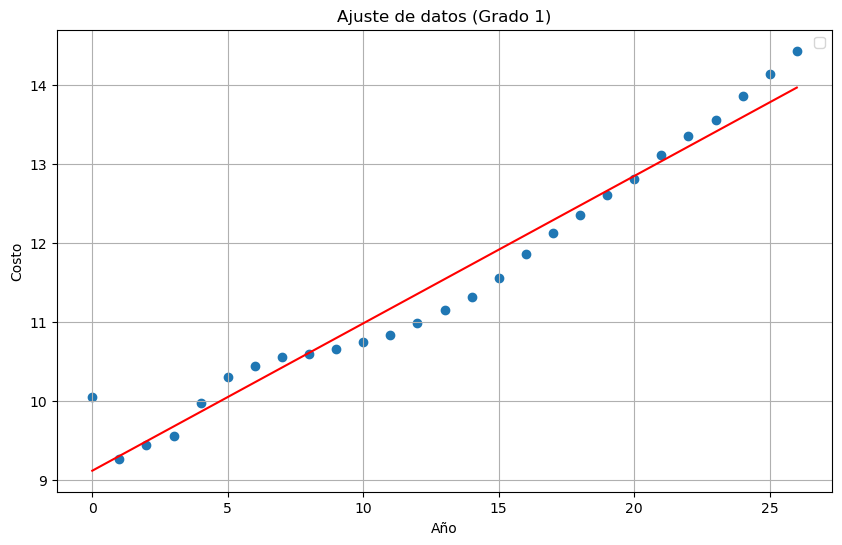

In [12]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt


def funcion_de_costo(beta, X, y):
    beta = np.reshape(beta, [2, 1])
    y_pred = X @ beta
    error = y_pred - y
    return (error.T @ error)[0][0]

x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26])
y = np.array([10.051101,  9.259127,  9.444813,  9.557723,  9.977324, 10.298326,
       10.447217, 10.550506, 10.590784, 10.657418, 10.743085, 10.831965,
       10.988435, 11.153055, 11.313326, 11.557165, 11.860136, 12.122511,
       12.356448, 12.611391, 12.814569, 13.111372, 13.357134, 13.559012,
       13.85861 , 14.135924, 14.436149])

beta_inicial = np.random.rand(2)
beta_inicial = np.reshape(beta_inicial, [2, -1])

n = len(y)
y_vector = np.reshape(y, [n, -1])
x_vector = np.reshape(x, [n, -1])
ones = np.ones([n, 1])
X = np.hstack((ones, x_vector))

sol = opt.minimize(funcion_de_costo, beta_inicial, args=(X, y_vector))

beta_optimizado = sol.x

y_regresion = X @ beta_optimizado

plt.figure(figsize=(10, 6))
plt.scatter(x, y)
plt.plot(x, y_regresion, color='red')
plt.xlabel('Año')
plt.ylabel('Costo')
plt.legend()
plt.title('Ajuste de datos (Grado 1)')
plt.grid(True)

plt.show()


C:\Users\PC\AppData\Local\Temp\ipykernel_19920\4224540766.py:32: DeprecationWarning: Use of `minimize` with `x0.ndim != 1` is deprecated. Currently, singleton dimensions will be removed from `x0`, but an error will be raised in SciPy 1.11.0.
  sol = opt.minimize(funcion_de_costo, beta_inicial, args=(X, y_vector))


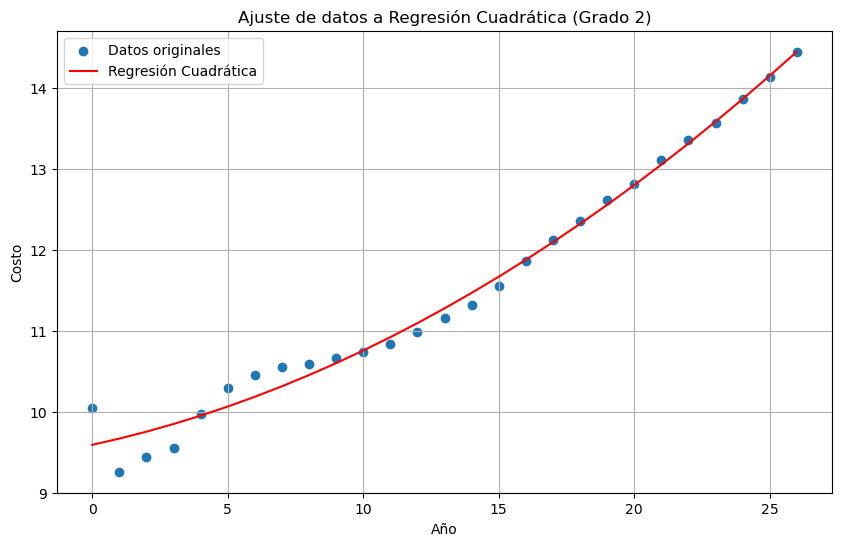

In [13]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

def funcion_de_costo(beta, X, y):
    beta = np.reshape(beta, [3, 1])
    y_pred = X @ beta
    error = y_pred - y
    return (error.T @ error)[0][0]

x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26])
y = np.array([10.051101,  9.259127,  9.444813,  9.557723,  9.977324, 10.298326,
       10.447217, 10.550506, 10.590784, 10.657418, 10.743085, 10.831965,
       10.988435, 11.153055, 11.313326, 11.557165, 11.860136, 12.122511,
       12.356448, 12.611391, 12.814569, 13.111372, 13.357134, 13.559012,
       13.85861 , 14.135924, 14.436149])

beta_inicial = np.random.rand(3)
beta_inicial = np.reshape(beta_inicial, [3, -1])

n = len(y)
y_vector = np.reshape(y, [n, -1])
x_vector = np.reshape(x, [n, -1])
ones = np.ones([n, 1])
X = np.hstack((ones, x_vector, x_vector**2)) 

sol = opt.minimize(funcion_de_costo, beta_inicial, args=(X, y_vector))

beta_optimizado = sol.x

y_regresion = X @ beta_optimizado

plt.figure(figsize=(10, 6))
plt.scatter(x, y)
plt.plot(x, y_regresion, label='Regresión Cuadrática', color='red')
plt.xlabel('Año')
plt.ylabel('Costo')
plt.legend()
plt.title('Ajuste de datos (Grado 2)')
plt.grid(True)

plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_19920\1413718563.py:27: DeprecationWarning: Use of `minimize` with `x0.ndim != 1` is deprecated. Currently, singleton dimensions will be removed from `x0`, but an error will be raised in SciPy 1.11.0.
  sol = opt.minimize(funcion_de_costo, beta_inicial, args=(X, y_vector))
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


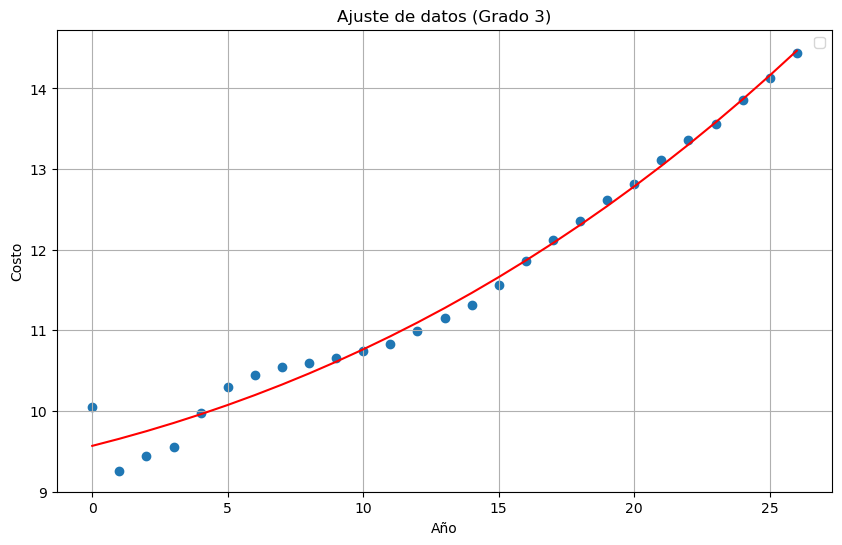

In [49]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

def funcion_de_costo(beta, X, y):
    beta = np.reshape(beta, [4, 1])
    y_pred = X @ beta
    error = y_pred - y
    return (error.T @ error)[0][0]

x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26])
y = np.array([10.051101,  9.259127,  9.444813,  9.557723,  9.977324, 10.298326,
       10.447217, 10.550506, 10.590784, 10.657418, 10.743085, 10.831965,
       10.988435, 11.153055, 11.313326, 11.557165, 11.860136, 12.122511,
       12.356448, 12.611391, 12.814569, 13.111372, 13.357134, 13.559012,
       13.85861 , 14.135924, 14.436149])

beta_inicial = np.random.rand(4)
beta_inicial = np.reshape(beta_inicial, [4, -1])

n = len(y)
y_vector = np.reshape(y, [n, -1])
x_vector = np.reshape(x, [n, -1])
ones = np.ones([n, 1])
X = np.hstack((ones, x_vector, x_vector**2, x_vector**3)) 

sol = opt.minimize(funcion_de_costo, beta_inicial, args=(X, y_vector))

beta_optimizado = sol.x

y_regresion = X @ beta_optimizado

plt.figure(figsize=(10, 6))
plt.scatter(x, y)
plt.plot(x, y_regresion, color='red')
plt.xlabel('Año')
plt.ylabel('Costo')
plt.legend()
plt.title('Ajuste de datos (Grado 3)')
plt.grid(True)

plt.show()

---

___
### Problema 2

El archivo `population_data.csv` contiene información histórica anual de México relativa a la población, nacimientos y muertes desde el año 1950 hasta el año 2015. La primer columna corresponde a los años, la segunda a la población, la tercera a los nacimientos y la última a los decesos.

Tomado de: https://en.wikipedia.org/wiki/Demographics_of_Mexico.

Importe estos datos usando la función `read_csv` del paquete `pandas`

1. Usando los años como variable independiente $x$ y la población como variable dependiente $y$, ajustar polinomios de grado 1 hasta grado 3.

    * Mostrar en un solo gráfico los datos de población contra los años, y los polinomios ajustados.

    * Graficar el error cuadrático acumulado contra el número de términos.

2. Repetir el punto 1 usando los nacimientos como variable dependiente $y$. Grafique las curvas ajustadas junto con los datos de nacimientos. Vea en un gráfico el error acumulado.

## Punto 1

C:\Users\PC\AppData\Local\Temp\ipykernel_19920\2329200877.py:30: DeprecationWarning: Use of `minimize` with `x0.ndim != 1` is deprecated. Currently, singleton dimensions will be removed from `x0`, but an error will be raised in SciPy 1.11.0.
  sol = opt.minimize(funcion_de_costo, beta_inicial, args=(X, y_vector))


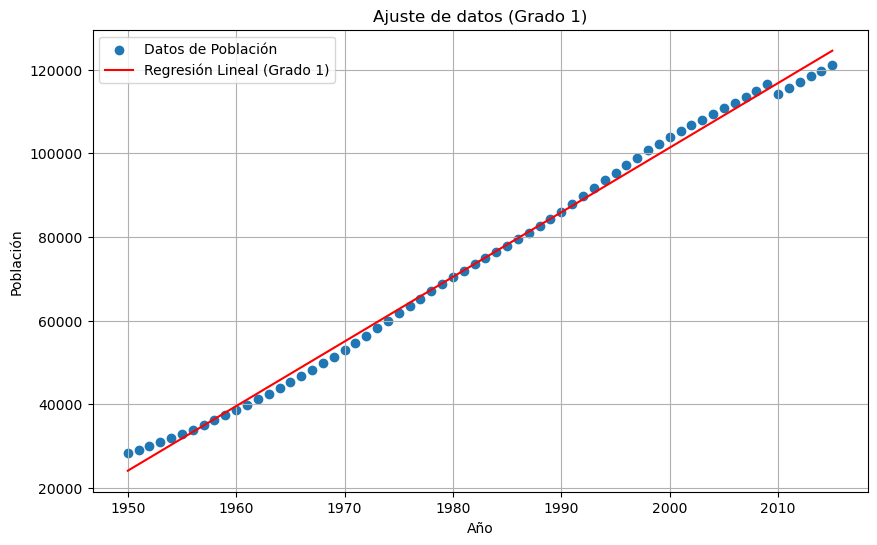

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('population_data.csv')

years = data['Year']
poblacion = data['Poblacion']

def funcion_de_costo(beta, X, y):
    beta = np.reshape(beta, [2, 1])
    y_pred = X @ beta
    error = y_pred - y
    return (error.T @ error)[0][0]

x = years.values
y = poblacion.values

n = len(y)
y_vector = np.reshape(y, [n, -1])
x_vector = np.reshape(x, [n, -1])
ones = np.ones([n, 1])
X = np.hstack((ones, x_vector))

beta_inicial = np.random.rand(2)
beta_inicial = np.reshape(beta_inicial, [2, -1])

import scipy.optimize as opt

sol = opt.minimize(funcion_de_costo, beta_inicial, args=(X, y_vector))
beta_optimizado = sol.x

y_factor = X @ beta_optimizado

plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Datos de Población')
plt.plot(x, y_factor, color='red', label='Regresión Lineal (Grado 1)')
plt.xlabel('Año')
plt.ylabel('Población')
plt.legend()
plt.title('Ajuste de datos (Grado 1)')
plt.grid(True)

plt.show()



C:\Users\PC\AppData\Local\Temp\ipykernel_19920\2321379296.py:27: DeprecationWarning: Use of `minimize` with `x0.ndim != 1` is deprecated. Currently, singleton dimensions will be removed from `x0`, but an error will be raised in SciPy 1.11.0.
  sol = opt.minimize(funcion_de_costo, beta_inicial, args=(X, y_vector))


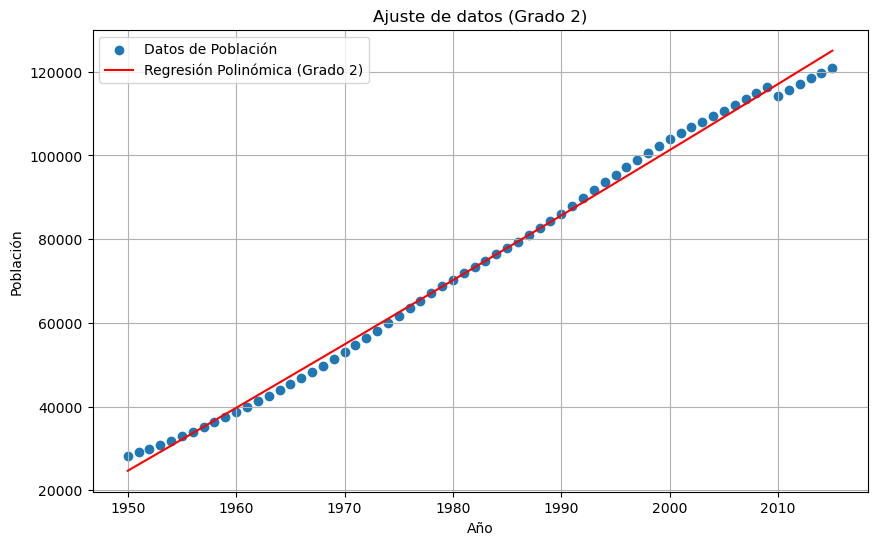

In [35]:

data = pd.read_csv('population_data.csv')

years = data['Year']
poblacion = data['Poblacion']

def funcion_de_costo(beta, X, y):
    beta = np.reshape(beta, [3, 1])
    y_pred = X @ beta
    error = y_pred - y
    return (error.T @ error)[0][0]

x = years.values
y = poblacion.values

n = len(y)
y_vector = np.reshape(y, [n, -1])
x_vector = np.reshape(x, [n, -1])
ones = np.ones([n, 1])

X = np.hstack((ones, x_vector, x_vector**2))

beta_inicial = np.random.rand(3)
beta_inicial = np.reshape(beta_inicial, [3, -1])

import scipy.optimize as opt

sol = opt.minimize(funcion_de_costo, beta_inicial, args=(X, y_vector))
beta_optimizado = sol.x

y_factor = X @ beta_optimizado

plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Datos de Población')
plt.plot(x, y_factor, color='red', label='Regresión Polinómica (Grado 2)')
plt.xlabel('Año')
plt.ylabel('Población')
plt.legend()
plt.title('Ajuste de datos (Grado 2)')
plt.grid(True)

plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_19920\1300018130.py:31: DeprecationWarning: Use of `minimize` with `x0.ndim != 1` is deprecated. Currently, singleton dimensions will be removed from `x0`, but an error will be raised in SciPy 1.11.0.
  sol = opt.minimize(funcion_de_costo, beta_inicial, args=(X, y_vector))


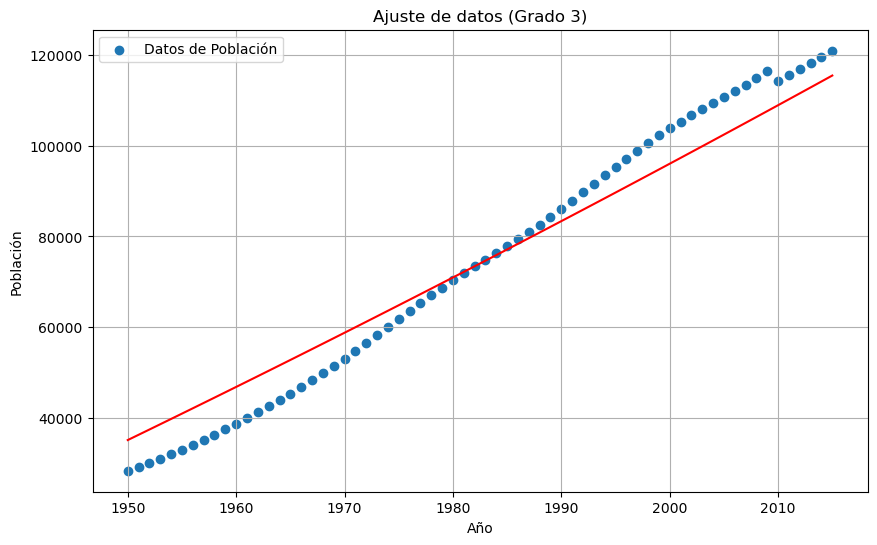

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('population_data.csv')

years = data['Year']
poblacion = data['Poblacion']

def funcion_de_costo(beta, X, y):
    beta = np.reshape(beta, [4, 1])
    y_pred = X @ beta
    error = y_pred - y
    return (error.T @ error)[0][0]

x = years.values
y = poblacion.values

n = len(y)
y_vector = np.reshape(y, [n, -1])
x_vector = np.reshape(x, [n, -1])
ones = np.ones([n, 1])

X = np.hstack((ones, x_vector, x_vector**2, x_vector**3))

beta_inicial = np.random.rand(4)
beta_inicial = np.reshape(beta_inicial, [4, -1])

import scipy.optimize as opt

sol = opt.minimize(funcion_de_costo, beta_inicial, args=(X, y_vector))
beta_optimizado = sol.x

y_factor = X @ beta_optimizado

plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Datos de Población')
plt.plot(x, y_factor, color='red')
plt.xlabel('Año')
plt.ylabel('Población')
plt.legend()
plt.title('Ajuste de datos (Grado 3)')
plt.grid(True)

plt.show()


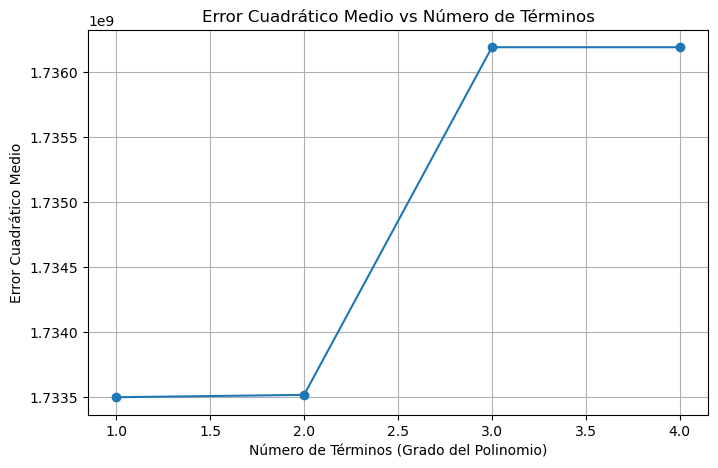

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('population_data.csv')

years = data['Year']
poblacion = data['Poblacion']

x = years.values
y = poblacion.values

n = len(y)
y_vector = np.reshape(y, [n, -1])
x_vector = np.reshape(x, [n, -1])
ones = np.ones([n, 1])
X = np.hstack((ones, x_vector, x_vector**2, x_vector**3))

mse_values = []

for grado in range(1, 5):  # Vamos a calcular hasta grado 4
    X_poly = X[:, :grado+1]

    beta = np.linalg.inv(X_poly.T @ X_poly) @ X_poly.T @ y_vector

    y_pred = X_poly @ beta

    mse = np.mean((y_pred - y) ** 2)
    
    mse_values.append(mse)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 5), mse_values, marker='o')
plt.xlabel('Número de Términos (Grado del Polinomio)')
plt.ylabel('Error Cuadrático Medio')
plt.title('Error Cuadrático Medio vs Número de Términos')
plt.grid(True)

plt.show()


## Punto 2

C:\Users\PC\AppData\Local\Temp\ipykernel_19920\4118012912.py:25: DeprecationWarning: Use of `minimize` with `x0.ndim != 1` is deprecated. Currently, singleton dimensions will be removed from `x0`, but an error will be raised in SciPy 1.11.0.
  sol = opt.minimize(funcion_de_costo, beta_inicial, args=(X, y_vector))
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


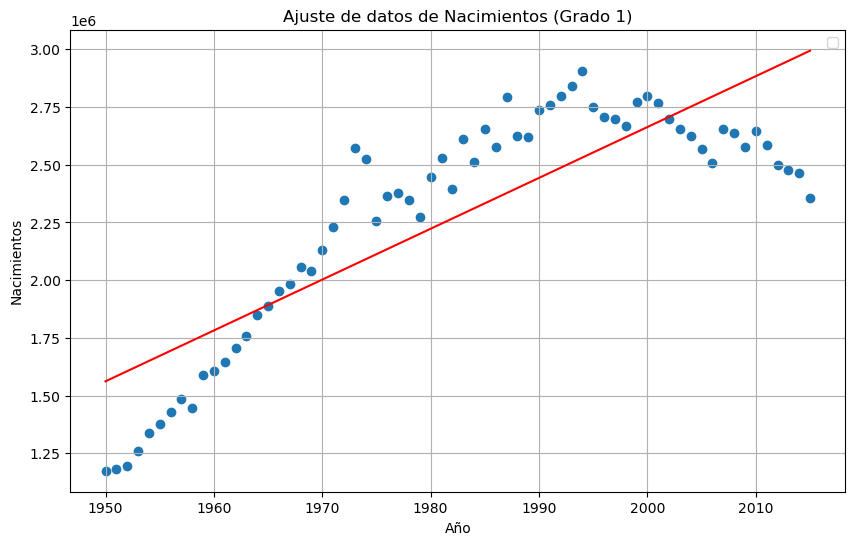

In [60]:

data = pd.read_csv('population_data.csv')

years = data['Year']
nacimientos = data['Nacimientos']  

def funcion_de_costo(beta, X, y):
    beta = np.reshape(beta, [2, 1])
    y_pred = X @ beta
    error = y_pred - y
    return (error.T @ error)[0][0]

x = years.values
y = nacimientos.values  
n = len(y)
y_vector = np.reshape(y, [n, -1])
x_vector = np.reshape(x, [n, -1])
ones = np.ones([n, 1])
X = np.hstack((ones, x_vector))

beta_inicial = np.random.rand(2)
beta_inicial = np.reshape(beta_inicial, [2, -1])

import scipy.optimize as opt

sol = opt.minimize(funcion_de_costo, beta_inicial, args=(X, y_vector))
beta_optimizado = sol.x

y_factor = X @ beta_optimizado


plt.figure(figsize=(10, 6))
plt.scatter(x, y)
plt.plot(x, y_factor, color='red')
plt.xlabel('Año')
plt.ylabel('Nacimientos')
plt.legend()
plt.title('Ajuste de datos de Nacimientos (Grado 1)')
plt.grid(True)

plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_19920\3388740612.py:35: DeprecationWarning: Use of `minimize` with `x0.ndim != 1` is deprecated. Currently, singleton dimensions will be removed from `x0`, but an error will be raised in SciPy 1.11.0.
  sol = opt.minimize(funcion_de_costo, beta_inicial, args=(X, y_vector))
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


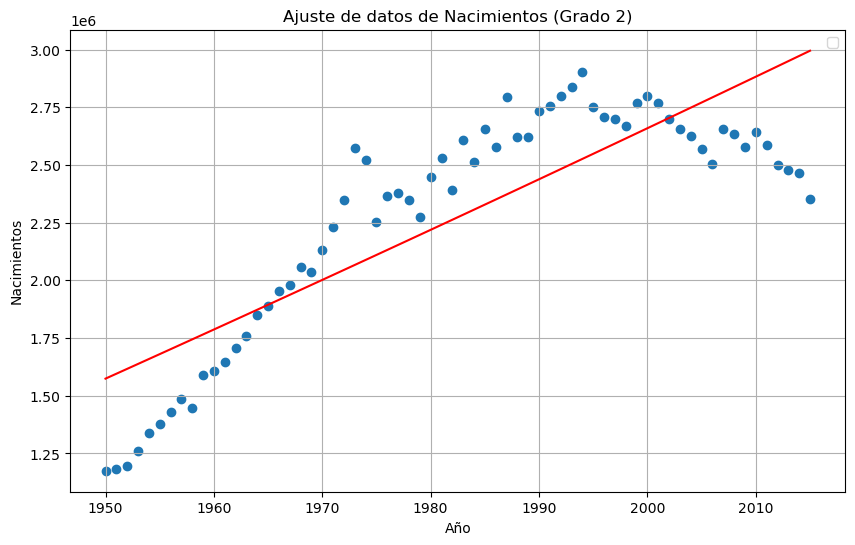

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('population_data.csv')

years = data['Year']
nacimientos = data['Nacimientos']  

def funcion_de_costo(beta, X, y):
    beta = np.reshape(beta, [3, 1])
    y_pred = X @ beta
    error = y_pred - y
    return (error.T @ error)[0][0]

x = years.values
y = nacimientos.values 
m = len(y)

ones = np.ones([m, 1])

x_factor = np.reshape(x, [m, 1])

x2_factor = np.reshape(x**2, [m, 1])

X = np.hstack((ones, x_factor, x2_factor))

y_vector = np.reshape(y, [m, 1])

beta_inicial = np.random.rand(3)
beta_inicial = np.reshape(beta_inicial, [3, -1])

import scipy.optimize as opt

sol = opt.minimize(funcion_de_costo, beta_inicial, args=(X, y_vector))
beta_optimizado = sol.x

y_factor = X @ beta_optimizado

plt.figure(figsize=(10, 6))
plt.scatter(x, y)
plt.plot(x, y_factor, color='red')
plt.xlabel('Año')
plt.ylabel('Nacimientos')
plt.legend()
plt.title('Ajuste de datos de Nacimientos (Grado 2)')
plt.grid(True)

plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_19920\312940800.py:38: DeprecationWarning: Use of `minimize` with `x0.ndim != 1` is deprecated. Currently, singleton dimensions will be removed from `x0`, but an error will be raised in SciPy 1.11.0.
  sol = opt.minimize(funcion_de_costo, beta_inicial, args=(X, y_vector))
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


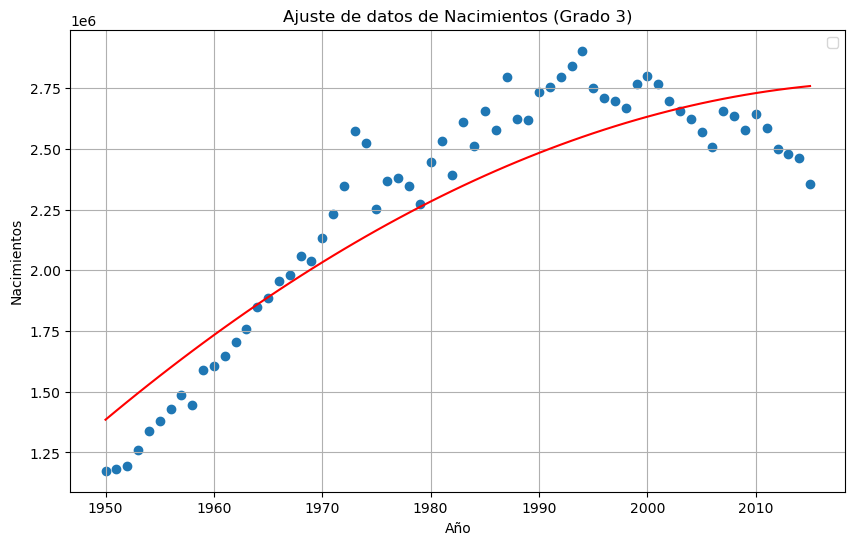

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('population_data.csv')

years = data['Year']
nacimientos = data['Nacimientos']  

def funcion_de_costo(beta, X, y):
    beta = np.reshape(beta, [4, 1])
    y_pred = X @ beta
    error = y_pred - y
    return (error.T @ error)[0][0]

x = years.values
y = nacimientos.values  

n = len(y)
y_vector = np.reshape(y, [n, -1])
x_vector = np.reshape(x, [n, -1])

ones = np.ones([n, 1])

x_factor = np.reshape(x, [n, 1])

x2_factor = np.reshape(x**2, [n, 1])

x3_factor = np.reshape(x**3, [n, 1])

X = np.hstack((ones, x_factor, x2_factor, x3_factor))

beta_inicial = np.random.rand(4)
beta_inicial = np.reshape(beta_inicial, [4, -1])

import scipy.optimize as opt

sol = opt.minimize(funcion_de_costo, beta_inicial, args=(X, y_vector))
beta_optimizado = sol.x

y_factor = X @ beta_optimizado

plt.figure(figsize=(10, 6))
plt.scatter(x, y)
plt.plot(x, y_factor, color='red')
plt.xlabel('Año')
plt.ylabel('Nacimientos')
plt.legend()
plt.title('Ajuste de datos de Nacimientos (Grado 3)')
plt.grid(True)

plt.show()


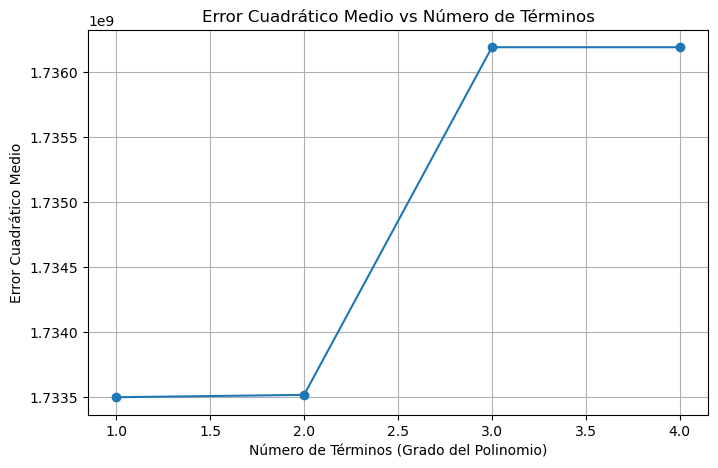

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('population_data.csv')

years = data['Year']
poblacion = data['Poblacion']

x = years.values
y = poblacion.values

n = len(y)
y_vector = np.reshape(y, [n, -1])
x_vector = np.reshape(x, [n, -1])
ones = np.ones([n, 1])
X = np.hstack((ones, x_vector, x_vector**2, x_vector**3))

mse_values = []

for grado in range(1, 5):  # Vamos a calcular hasta grado 4
    X_poly = X[:, :grado+1]

    # Calcular los coeficientes utilizando la fórmula de mínimos cuadrados
    beta = np.linalg.inv(X_poly.T @ X_poly) @ X_poly.T @ y_vector

    # Predecir los valores utilizando el modelo polinómico
    y_pred = X_poly @ beta

    # Calcular el error cuadrático medio
    mse = np.mean((y_pred - y) ** 2)
    
    mse_values.append(mse)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 5), mse_values, marker='o')
plt.xlabel('Número de Términos (Grado del Polinomio)')
plt.ylabel('Error Cuadrático Medio')
plt.title('Error Cuadrático Medio vs Número de Términos')
plt.grid(True)

plt.show()

